In [1170]:
# press keys C then H to open keyboard shortcuts
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [1171]:
# read Telecom Churn data
churn_df = pd.read_csv('Telco-Customer-Churn.csv')

In [1172]:
# list columns
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1173]:
churn_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1174]:
churn_df.shape

(7043, 21)

In [1175]:
churn_df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [1176]:
churn_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [1177]:
# convert string values to numeric but there are empty str values so the code doesnt work....
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'])

ValueError: Unable to parse string " " at position 753

In [1178]:
# Total Charges has empty str values...drop missing value rows 
churn_df.drop(churn_df.index[[488, 753, 936,1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]], inplace = True)


In [1179]:
# convert string values to numeric
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'])

In [1180]:
# Binning age in categories
bins = [0,6,12, 24, 36, 48, 62, 120]
labels = ['0-6', '6-12', '12-24', '24-36', '36-48', '48-62', '62+']
churn_df['tenure_range'] = pd.cut(churn_df.tenure, bins, labels = labels,include_lowest = True)


In [1181]:
# Few columns have No and No internet service categories.....chane 'No internet service' chnages to 'No'
churn_df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [1182]:
churn_df['MultipleLines'][churn_df['MultipleLines'] == 'No phone service'] = 'No'
churn_df['InternetService'][churn_df['InternetService'] == 'No internet service'] = 'No'
churn_df['OnlineSecurity'][churn_df['OnlineSecurity'] == 'No internet service'] = 'No'
churn_df['OnlineBackup'][churn_df['OnlineBackup'] == 'No internet service'] = 'No'
churn_df['DeviceProtection'][churn_df['DeviceProtection'] == 'No internet service'] = 'No'
churn_df['TechSupport'][churn_df['TechSupport'] == 'No internet service'] = 'No'
churn_df['StreamingTV'][churn_df['StreamingTV'] == 'No internet service'] = 'No'
churn_df['StreamingMovies'][churn_df['StreamingMovies'] == 'No internet service'] = 'No'

C:\Users\VIJASH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\VIJASH\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\VIJASH\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\VIJASH\Anaconda3\lib\site-packages\ipykernel

In [1183]:
churn_df['OnlineBackup'].value_counts()

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

In [1184]:
# drop customer ID and tenure as cust ID doesnt have any impact on churn, and for tenure we already 
# have new column 'tenure_range'
churn_df = churn_df.drop(['customerID', 'tenure'], axis=1)

In [1185]:
# Create new dataframe only with categorical variables
new_churn_df = churn_df[['gender', 'tenure_range', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       ]] 

In [1186]:
# Create dummies for categorical features
labelencoder_X = LabelEncoder()

In [1187]:
new_churn_df1 = new_churn_df.apply(labelencoder_X.fit_transform)

In [1188]:
new_churn_df1.head(5)

,gender,tenure_range,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2
1,1,2,0,0,1,0,0,1,0,1,0,0,0,1,0,3
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3
3,1,3,0,0,0,0,0,1,0,1,1,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [1189]:
#Add categorical dataframe to numeric variables dataframe
churn_df2 = churn_df.iloc[:, [1,16,17]]

In [1190]:
X = pd.concat([new_churn_df1, churn_df2], axis=1)


In [1191]:
# Seperate Target variable
y = churn_df['Churn'].values
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [1194]:
X = X.as_matrix()


In [1195]:
X.dtype

dtype('float64')

In [1196]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [1197]:
# Using oneHot encoder for variables with more than 2 categories
enc = OneHotEncoder()
enc.fit(X[:, [1, 6, 13, 15]])


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [1198]:
enc.n_values_

array([7, 3, 3, 4])

In [1199]:
K = enc.transform(X[:, [1, 6, 13, 15]]).toarray()


In [1200]:
X = np.delete(X,[1, 6, 13, 15], 1 )


In [1201]:
X.shape

(7032, 15)

In [1202]:
X = np.concatenate((X,K),axis=1)

In [1203]:
K.shape
X.shape


(7032, 32)

In [1204]:
X[0,:]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   0.  ,  29.85,  29.85,   1.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ])

In [ ]:
# Avoid Dummy trap, deleting one columns from each of OneHotEncode array [7,3,3,4]

In [1207]:
X = np.delete(X,[15, 22, 25, 28], 1)


In [1209]:
X.shape

(7032, 28)

In [ ]:
# (If time permits try feature scaling)

In [1210]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [1211]:
# Feature Selection 

In [1212]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [1213]:
model_1 = LogisticRegression()

In [1214]:
rfe = RFE(model_1, 18)

In [1215]:
rfe = rfe.fit(X, y)

In [1216]:
rfe.support_

array([False, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True, False], dtype=bool)

In [1217]:
rfe.ranking_

array([ 7,  9,  4,  1,  1,  1,  3,  8,  1,  1,  1,  1,  2, 10, 11,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  6])

In [1218]:
# Implementing Logistic model for finding features with p-value less than 0.05

In [1221]:
import statsmodels.api as sm

In [1222]:
logit_model=sm.Logit(y,X)

In [1223]:
result=logit_model.fit()



Optimization terminated successfully.
         Current function value: 0.411250
         Iterations 8


In [1224]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7004
Method:                           MLE   Df Model:                           27
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.2897
Time:                        15:19:52   Log-Likelihood:                -2891.9
converged:                       True   LL-Null:                       -4071.7
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0151      0.065     -0.231      0.817        -0.143     0.113
x2             0.0076      0.078      0.097      0.923        -0.146     0.161
x3            -0.1269      0.090     -1.408      0.1

In [1225]:
X_train = X_train[:, [3,4,5,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,26]]


In [1226]:
X_test = X_test[:, [3,4,5,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,26]]

In [1227]:
# Logistic Regression Model 

In [1228]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1229]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
#Cross Validation

In [1230]:
X_test.shape

(2110, 19)

In [1231]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.805


In [1232]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1406  149]
 [ 271  284]]


In [1233]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1555
          1       0.66      0.51      0.57       555

avg / total       0.79      0.80      0.79      2110



In [1234]:
# ROC Curve

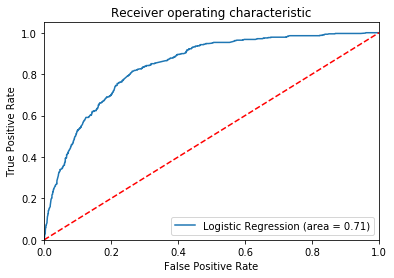

In [1235]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()